## Round 2

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
# Creating the initial dataframe
df = pd.read_csv('./marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,Married,253,NaN,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


1. Show the dataframe shape

In [3]:
df.shape

(10910, 26)

2. Standardize the header names

In [4]:
# inspect the header names
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
# we have to convert it so snake format
cols = []
for column in df.columns:
    cols.append(column.lower())
df.columns = cols

In [6]:
# check if it worked
df.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [7]:
# replace spaces with _
cols = []
for column in df.columns:
    cols.append(column.replace(' ','_'))
df.columns = cols

In [8]:
# check if it worked
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

3. Which columns are numerical?

In [9]:
df.select_dtypes(['int32', 'float64'])

,customer_lifetime_value,months_since_last_claim,number_of_open_complaints,total_claim_amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


4. Which columns are categorical?

In [10]:
df.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


5. Check and deal with NaN values

In [11]:
# Checking for NaN values
df.isna().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [12]:
# We drop the rows where we have NaN for responses, because otherwise later we cant translate it to
# numericals for our later analysis
# Inserting the mode would tip the balance heavily into one direction
df = df[df['response'].isna()==False] 

In [13]:
df.isna().sum()

unnamed:_0                          0
customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           591
months_since_policy_inception       0
number_of_open_complaints         591
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     591
vehicle_size                      591
vehicle_type                     5164
dtype: int64

In [14]:
# for vehicle_type we have nearly 50% missing data, which renders it useless, the column will be dropped
df = df.drop(['vehicle_type'], axis = 1)

In [15]:
df.isna().sum()

unnamed:_0                         0
customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          591
months_since_policy_inception      0
number_of_open_complaints        591
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                    591
vehicle_size                     591
dtype: int64

In [16]:
# vehicle class and vehicle size aren't known in the same rows, we cant extrapolate anything and add anew category "unknown_size""unknown_class
df['vehicle_class'] = df['vehicle_class'].fillna('unknown_class')
df['vehicle_size'] = df['vehicle_size'].fillna('unknown_size')
df.isna().sum()

unnamed:_0                         0
customer                           0
state                              0
customer_lifetime_value            0
response                           0
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          591
months_since_policy_inception      0
number_of_open_complaints        591
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                      0
vehicle_size                       0
dtype: int64

In [17]:
# for 'number_of_open_complaints' we fill with the mode because nearly 80% have 0.0 open complaints
df['number_of_open_complaints'].value_counts()

0.0    7695
1.0    1076
2.0     392
3.0     304
4.0     161
5.0      60
Name: number_of_open_complaints, dtype: int64

In [18]:
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0.0)

In [19]:
# for 'months_since_last_claim' we fill with the mean
df['months_since_last_claim'].value_counts()
mslc= df['months_since_last_claim'].mean()
df['months_since_last_claim'] = df['months_since_last_claim'].fillna(mslc)

In [20]:
# all NULL values are dealt with
df.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [21]:
# Extract the month into a new column
import time
from datetime import date

In [22]:
df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [23]:
df['month'] = pd.DatetimeIndex(df['month']).month

In [24]:
df['month'].unique()

array([2, 1], dtype=int64)

In [25]:
# There is already just data for january and february in the source file

## Round 3

In [26]:
# 1. Show DataFrame info

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10279 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10279 non-null  int64  
 1   customer                       10279 non-null  object 
 2   state                          10279 non-null  object 
 3   customer_lifetime_value        10279 non-null  float64
 4   response                       10279 non-null  object 
 5   coverage                       10279 non-null  object 
 6   education                      10279 non-null  object 
 7   effective_to_date              10279 non-null  object 
 8   employmentstatus               10279 non-null  object 
 9   gender                         10279 non-null  object 
 10  income                         10279 non-null  int64  
 11  location_code                  10279 non-null  object 
 12  marital_status                 10279 non-null 

In [28]:
# 2. Describe the DataFrame

# For categorical data
df.describe(include=[np.object]).T

C:\Users\Giancarlo\AppData\Local\Temp\ipykernel_384\2523703900.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
customer,10279,9134,ID89933,5
state,10279,5,California,3552
response,10279,2,No,8813
coverage,10279,3,Basic,6284
education,10279,5,Bachelor,3094
effective_to_date,10279,59,1/27/11,225
employmentstatus,10279,5,Employed,6398
gender,10279,2,F,5232
location_code,10279,3,Suburban,6519
marital_status,10279,3,Married,5949


In [29]:
# For numerical data
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000,10279.000000
mean,5473.485650,8029.229015,37541.332425,93.245063,15.129851,48.134157,0.361514,2.970912,435.736506,1.464442
std,3149.220531,6917.287221,30350.225408,34.445333,9.768734,27.921951,0.888436,2.394379,292.321294,0.498758
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2742.500000,4013.084627,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,272.788141,1.000000
50%,5485.000000,5780.182197,33837.000000,83.000000,15.000000,48.000000,0.000000,2.000000,384.000000,1.000000
75%,8205.500000,8992.381828,62100.500000,109.000000,23.000000,71.000000,0.000000,4.000000,548.327777,2.000000
max,10908.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [30]:
# For the following analysis we convert the responses to a numerical value, 'Yes' = 1, 'No' = 0
df['response'] = df['response'].apply(lambda x : 1 if x == 'Yes' else 0)

In [31]:
# importing needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

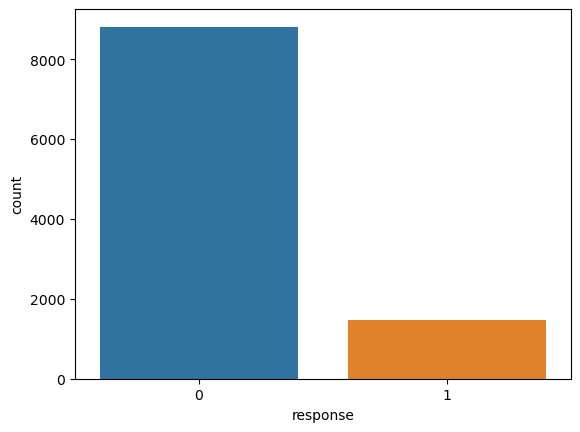

In [32]:
# 3. Show a plot of the total number of responses
sns.countplot(x='response', data=df)
plt.show()

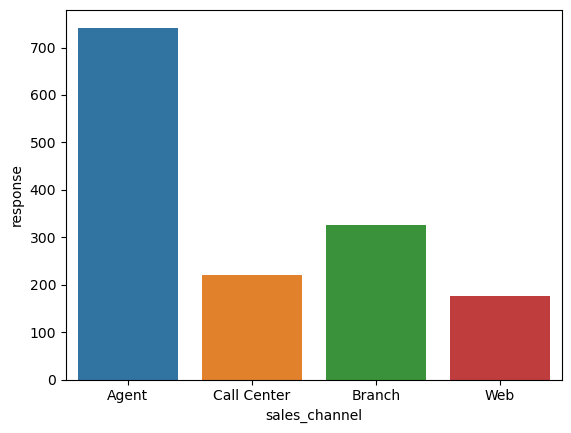

In [35]:
# 4. Show a plot of the response rate by the sales channel
sns.barplot(data=df, x='sales_channel', y='response', estimator=sum, ci=None)
plt.show()

In [37]:
# 5.Show a plot of the response rate by the total claim amount

In [ ]:
# 6. Show a plot of the response rate by income